In [2]:
## Figure 9 - Compare DEM error correction on Cerro Azul with ALOS data and show the estimated step functions
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt, ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pysar.plot_network as pnet
from pysar.simulation.plot import *
from pysar.objects import sensor, timeseries
from pysar.utils import ptime, readfile, plot as pp, utils as ut
from pysar import view
work_dir = os.path.expanduser('~/development/python/2018_ComputGeosci_PySAR')
print('Done.')

Done.


save figure to file: CerroAzul_dike_step.png


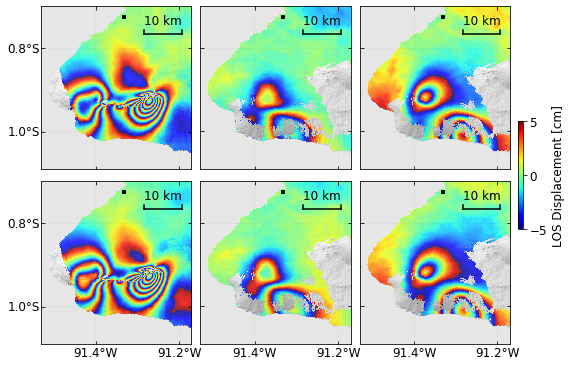

In [4]:
## Plot - 
print_msg = False
step_files = []
ts_files   = []
mask_files = []
proj_dirs = [os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/GEOCODE'),
             os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE'),
             os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE')]
for proj_dir in proj_dirs:
    step_files.append(os.path.join(proj_dir, 'geo_timeseriesStepModel.h5'))
    ts_files.append(os.path.join(proj_dir, 'geo_timeseries_ECMWF_ramp_demErr.h5'))
    mask_files.append(os.path.join(proj_dir, 'geo_maskTempCoh.h5'))
dem_file = os.path.join(proj_dir, '../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84')
fnames = ['{} 20080604 --ref-date 20080304 -m {}'.format(ts_files[0], mask_files[0]),
          '{} 20170320 --ref-date 20170308 -m {}'.format(ts_files[1], mask_files[1]),
          '{} 20170401 --ref-date 20170320 -m {}'.format(ts_files[2], mask_files[2]),
          '{} 20080529 -m {}'.format(step_files[0], mask_files[0]),
          '{} 20170319 -m {}'.format(step_files[1], mask_files[1]),
          '{} 20170321 -m {}'.format(step_files[2], mask_files[2])]
lalo_locs = ['1 0 0 0',
             '0 0 0 0',
             '0 0 0 0',
             '1 0 0 1',
             '0 0 0 1',
             '0 0 0 1']

# Plot
wrap_range = [-5, 5]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[7, 5])
for i in range(len(fnames)):
    cmd = 'view.py {} --dem {} --dem-nocontour '.format(fnames[i], dem_file)
    cmd += '--sub-lat -1.09 -0.70 --sub-lon -91.53 -91.17 '
    cmd += '--wrap --wrap-range {} {} '.format(wrap_range[0], wrap_range[1])
    cmd += '--scalebar 0.3 0.81 0.83 --scalebar-pad 0.08 '
    cmd += '--notitle --lalo-step 0.2 --fontsize 12 --nocbar --lalo-loc {} '.format(lalo_locs[i])
    cmd += '--ref-lalo -0.7235 -91.3340 --ref-size 3 '
    data, atr, inps = view.prep_slice(cmd, print_msg=print_msg)
    im = view.plot_slice(axs.flatten()[i], data, atr, inps, print_msg=print_msg)[2]

## POI
#axs[0].plot(pts_lon, pts_lat, '*', ms=10, mfc='none', color='k', mew=1)
plt.tight_layout(pad=1)

# colorbar
fig.subplots_adjust(right=0.95)
cax = fig.add_axes([0.965, 0.35, 0.01, 0.3])
cbar = plt.colorbar(im, cax=cax, ticks=[wrap_range[0], 0, wrap_range[1]])
cbar.ax.tick_params(which='both', direction='out', labelsize=font_size)
cbar.set_label('LOS Displacement [cm]', fontsize=font_size, labelpad=5)

out_file = 'CerroAzul_dike_step.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:', out_file)
plt.show()

In [ ]:
plt.figure(); plt.imshow(data); plt.show()

In [11]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ee91d0>,
      dtype=object)

In [ ]:
work_dir = os.path.expanduser('~/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/DEM_ERR')
os.chdir(work_dir)
print('Go to diretory: '+work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

ts_files = ['timeseries_ECMWF_ramp.h5', 
            'timeseries_ECMWF_ramp_demErrOrig.h5', 
            'timeseries_ECMWF_ramp_demErrExt.h5']
geom_file = '../INPUTS/geometryGeo.h5'
dem_file = '../../DEM/srtm1.dem'

num_file = len(ts_files)
obj = timeseries(ts_files[0])
obj.open()
dates, datevector = ptime.date_list2vector(obj.dateList)

## Point of Interest
pts_lat, pts_lon = -0.928, -91.270
coord = ut.coordinate(obj.metadata, geom_file)
pts_y, pts_x = coord.geo2radar(pts_lat, pts_lon)[0:2]
print('Done.')

In [2]:
## Run PYSAR commands to get the comparison result
cmd = 'cp ../exclude_date.txt ../maskTempCoh.h5 ../GEOCODE/geo_maskTempCoh.h5 .\n'
cmd += 'remove_ramp.py ../timeseries_ECMWF.h5 -s linear -m maskTempCoh.h5 -o ./timeseries_ECMWF_ramp.h5'
print(cmd)
os.system(cmd)

cmd  = 'dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrOrig.h5\n'
cmd += 'dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrExt.h5 --ex exclude_date.txt -s 20080529\n'
print(cmd)
os.system(cmd)

cmd = 'geocode.py timeseriesStepModel.h5 -l ../INPUTS/geometryGeo.h5\n'
print(cmd)
os.system(cmd)

cp ../exclude_date.txt ../maskTempCoh.h5 ../GEOCODE/geo_maskTempCoh.h5 .
remove_ramp.py ../timeseries_ECMWF.h5 -s linear -m maskTempCoh.h5 -o ./timeseries_ECMWF_ramp.h5
dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrOrig.h5
dem_error.py timeseries_ECMWF_ramp.h5 -g ../INPUTS/geometryRadar.h5 -o timeseries_ECMWF_ramp_demErrExt.h5 --ex exclude_date.txt -s 20080529

geocode.py timeseriesStepModel.h5 -l ../INPUTS/geometryGeo.h5



0

Estimated DEM error on (N-0.928, E-91.27): [[2.0262203]] m
save figure to file: SierraNegraAlosAT133_dem_err_compare.png


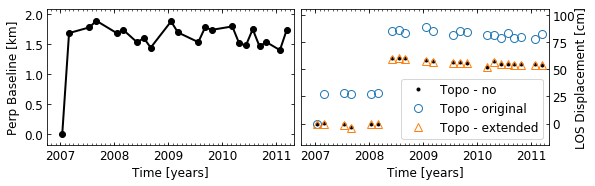

In [92]:
## Plot

# read data
box = (pts_x, pts_y, pts_x+1, pts_y+1)
dis_ts = np.zeros((obj.numDate, num_file))
for i in range(num_file):
    dis = readfile.read(ts_files[i], box=box)[0].flatten() * 100.
    dis -= dis[0]
    dis_ts[:, i] = dis
dem_err = readfile.read('demErr.h5', box=box)[0]
print('Estimated DEM error on (N{}, E{}): {} m'.format(pts_lat, pts_lon, dem_err))

# plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[9, 2.5])

# perp baseline history
ax = axs[0]
ax.plot(dates, obj.pbase/1000., '-ko', lw=2, ms=6, mfc='k')
# axis format
ax = pp.auto_adjust_yaxis(ax, obj.pbase/1000., fontsize=font_size)
ax.set_ylabel('Perp Baseline [km]', fontsize=font_size)

# displacement time-series
ax = axs[1]
ax.plot(dates, dis_ts[:, 0], 'k.', ms=6, label='Topo - no')
ax.plot(dates, dis_ts[:, 1], 'o',  ms=8, mfc='none', color=pp.mplColors[0], label='Topo - original')
ax.plot(dates, dis_ts[:, 2], '^',  ms=8, mfc='none', color=pp.mplColors[1], label='Topo - extended')
ax.set_ylim(-20, 105)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_ylabel('LOS Displacement [cm]', fontsize=font_size, labelpad=0)
ax.legend(fontsize=font_size)
fig.subplots_adjust(wspace=0.03)

for ax in axs:
    pp.auto_adjust_xaxis_date(ax, datevector, fontsize=font_size, every_year=1)[0]
    ax.set_xlabel('Time [years]', fontsize=font_size)
    ax.tick_params(which='both', direction='in', labelsize=font_size, top=True, bottom=True, left=True, right=True)

out_file = '{}_dem_err_compare.png'.format(proj_name)
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save figure to file:', out_file)
plt.show()

view.py /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5 20080604 --ref-date 20080304 --dem /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/GEOCODE/../../DEM/srtm1.dem --dem-nocontour --sub-lat -1.09 -0.69 --sub-lon -91.53 -91.17 --ref-lalo -0.708 -91.310 --wrap --wrap-range -5 5 --scalebar 0.3 0.81 0.83 --scalebar-pad 0.08 --notitle --lalo-step 0.2 --fontsize 12 --nocbar --lalo-loc 1 0 0 0 --ref-lalo -0.7100 -91.3103 --ref-size 3 

******************** Display ********************
input file is timeseries file: /Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5 in float32 format
file size in y/x: (928, 1089)
num of datasets in file geo_timeseries_ECMWF_ramp_demErr.h5: 22
datasets to exclude (0):
[]
datasets to display (1):
['timeseries-20080604']
input reference date: timeseries-20080304
data   coverage in y/x: (0, 0, 1089, 928)
subset coverage in y/x:

display data in transparency: 0.8
plot in Lat/Lon coordinate
map projection: cyl
boundary database resolution: c
plotting DEM background ...
show shaded relief DEM
plotting Data ...
plot scale bar
plot lat/lon labels
label step in degree: [0.2, 0.2]
plot reference point
view.py /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/geo_timeseriesStepModel.h5 20170321 --dem /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84 --dem-nocontour --sub-lat -1.09 -0.69 --sub-lon -91.53 -91.17 --ref-lalo -0.708 -91.310 --wrap --wrap-range -5 5 --scalebar 0.3 0.81 0.83 --scalebar-pad 0.08 --notitle --lalo-step 0.2 --fontsize 12 --nocbar --lalo-loc 0 0 0 1 --ref-lalo -0.7100 -91.3103 --ref-size 3 

******************** Display ********************
input file is timeseries file: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/geo_timeseriesStepModel.h5 in float32 format
file size in y/x: (2000, 1700)
num of

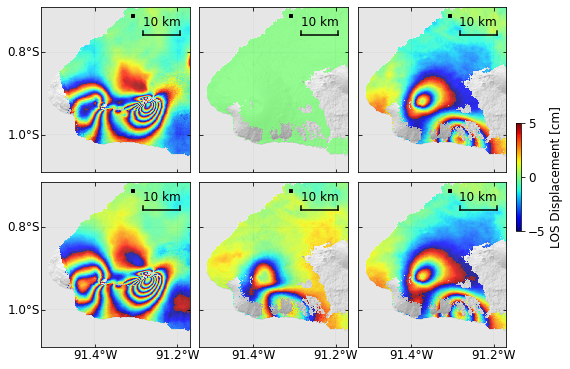

In [28]:
tnames

['/Users/yunjunz/insarlab/PYSAR_EXAMPLE/SierraNegraAlosAT133/PYSAR/GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5 20080604 --ref-date 20080304',
 '/Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5 20170320 --ref-date 20170308',
 '/Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE/geo_timeseries_ECMWF_ramp_demErr.h5 20170401 --ref-date 20170320']